<a href="https://colab.research.google.com/github/dif-unand/ML_Genap_2526/blob/main/Praktikum1/SimpleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_PATH = "/content/drive/MyDrive/ML/Dataset/advertising.csv"
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
print(df.head())

Shape: (200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [6]:
X = df[["TV"]]
y = df[["Sales"]]

In [7]:
reg_model = LinearRegression().fit(X, y)

print("\n=== Simple Linear Regression (Sales ~ TV) ===")
print("Intercept (b0):", reg_model.intercept_[0])
print("Coefficient TV (b1):", reg_model.coef_[0][0])


=== Simple Linear Regression (Sales ~ TV) ===
Intercept (b0): 6.974821488229891
Coefficient TV (b1): 0.055464770469558874


In [8]:
tv_150 = reg_model.intercept_[0] + reg_model.coef_[0][0] * 150
tv_500 = reg_model.intercept_[0] + reg_model.coef_[0][0] * 500
print("Prediksi Sales jika TV=150:", tv_150)
print("Prediksi Sales jika TV=500:", tv_500)

Prediksi Sales jika TV=150: 15.294537058663721
Prediksi Sales jika TV=500: 34.70720672300933


In [11]:
print("\nDescriptive stats:")
print(df.describe().T)


Descriptive stats:
           count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   15.1305   5.283892  1.6  11.000   16.00   19.050   27.0


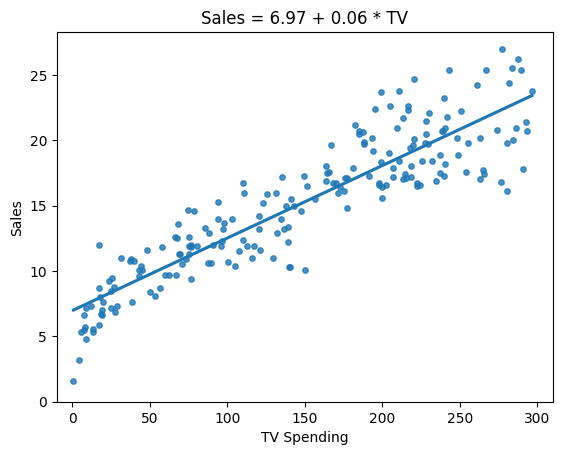

In [12]:
plt.figure()
sns.regplot(x=X, y=y, scatter_kws={'s': 15}, ci=False)
plt.title(f"Sales = {reg_model.intercept_[0]:.2f} + {reg_model.coef_[0][0]:.2f} * TV")
plt.xlabel("TV Spending")
plt.ylabel("Sales")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [13]:
y_pred = reg_model.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = reg_model.score(X, y)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 5.2177438977951285
RMSE: 2.2842381438447106
MAE: 1.8305872641932412
R2: 0.8121757029987414
